# Logistic Regression (SUV purchase Use Case)

#### 1. Initial Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#### 2. Load data
Load Pandas DataFrame from CSV file

In [2]:
suv_data = pd.read_csv('suv_data.csv')

#### 3. Initial data exploration

Use DataFrame info method to see column names, data types and null value counts:

In [3]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Use DataFrame head method to see first 10 rows of DataFrame:

In [4]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Use DataFrame describe method to see descriptive statistical values for numeric columns:

In [5]:
suv_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#### 4. Data exploration with visualisations

Imports for visualisation:

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

Create visualisation for each variable:
 - For qualitative variables (columns): plot count of each possible value - use seaborn countplot function
 - For quantitative variables (columns): plot histogram - use DataFrame plot.hist method

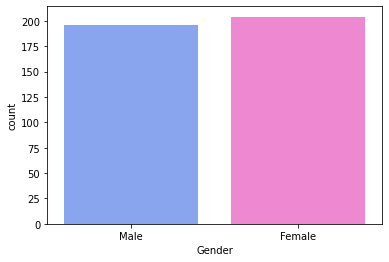

In [7]:
# Gender (qualitative)
sns.countplot(x='Gender', data=suv_data, 
              palette=['#789DFF',"#FF78D8"])
plt.show()

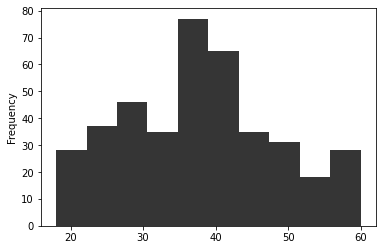

In [8]:
# Age (quantitative)
suv_data['Age'].plot.hist(bins=10, color='#353535')
plt.show()

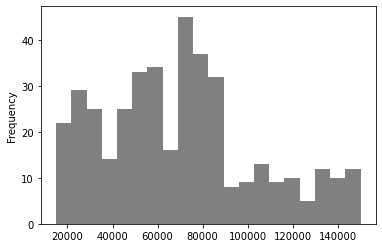

In [9]:
# EstimatedSalary (quantitative)
suv_data['EstimatedSalary'].plot.hist(bins=20, color="grey")
plt.show()

<AxesSubplot:xlabel='Purchased', ylabel='count'>

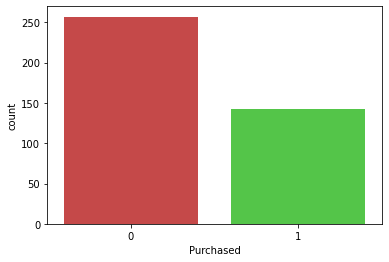

In [10]:
# Purchased (qualitative)
sns.countplot(x='Purchased', data=suv_data, 
              palette=['#DA3434','#43DA34'])

#### 5. Dependent and independent variables

At this point, I choose 'Age', 'Gender' and 'EstimatedSalary' as the *independent variables*; and to set 'Purchased' as the *dependent variable*.

This means that the logistic regression will try to predict whether a client will purchase an SUV car (1) or not (0) depending on the clients age, gender and salary; or a subset of these.

#### 6. Check for correlations between the independent variables and the dependent variable

##### 6.1. Correlation between Gender and Purchase variables:

Plot chart with number of males who purchased/did not purchase an SUV, and number of females who purchased/did not purchase an SUV - using seaborn countplot function.

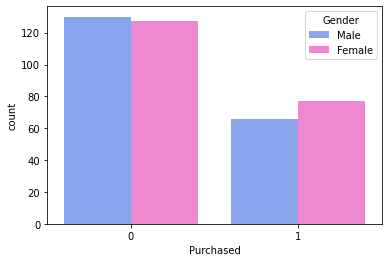

In [11]:
sns.countplot(x='Purchased', hue='Gender', data=suv_data, 
              palette=['#789DFF',"#FF78D8"])
plt.show()

There are slightly less females within the non-buyers, whereas there are slightly more females within the buyers. Thus, being a female slightly increases the probability of the client purchasing a SUV.

##### 6.2. Correlation between Age and Purchase variables:

In order to plot the correlation, firstly I group the age variable in intervals, creating a new "AgeGroup" column in the DataFrame. In order to create the intervals, I use the previously generated age histogram chart as a refference.

In [12]:
def apply_age_group(age):
    if age < 18:
        return '<18'
    elif age <= 30:
        return '18-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '40-50'
    else:
        return '>50'

suv_data['AgeGroup'] = suv_data['Age'].apply(apply_age_group)

suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeGroup
0,15624510,Male,19,19000,0,18-30
1,15810944,Male,35,20000,0,31-40
2,15668575,Female,26,43000,0,18-30
3,15603246,Female,27,57000,0,18-30
4,15804002,Male,19,76000,0,18-30


Plot chart with count of all combinations of the Purchase variable and the AgeGroup variable - using seaborn countplot function.

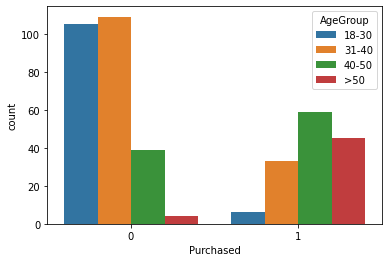

In [13]:
sns.countplot(x='Purchased', hue='AgeGroup', data=suv_data)
plt.show()

Clear pattern here: as client's age increases, the probability of them buying an SUV increases sharply.

##### 6.3. Correlation between EstimatedSalary and Purchase variables:

In order to plot the correlation, firstly I group the EstimatedSalary variable in intervals, creating a new "SalaryGroup" column in the DataFrame. In order to create the intervals, I use the previously generated salary histogram chart as a refference.

In [14]:
def apply_salary_group(salary):
    if salary < 30000:
        return '<30k'
    elif salary <= 60000:
        return '30-60k'
    elif salary <= 90000:
        return '60-90k'
    elif salary <= 115000:
        return '90-115k'
    else:
        return '>115k'

suv_data['SalaryGroup'] = suv_data['EstimatedSalary'].apply(apply_salary_group)
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeGroup,SalaryGroup
0,15624510,Male,19,19000,0,18-30,<30k
1,15810944,Male,35,20000,0,31-40,<30k
2,15668575,Female,26,43000,0,18-30,30-60k
3,15603246,Female,27,57000,0,18-30,30-60k
4,15804002,Male,19,76000,0,18-30,60-90k


Plot chart with count of all combinations of the Purchase variable and the SalaryGroup variable - using seaborn countplot function.

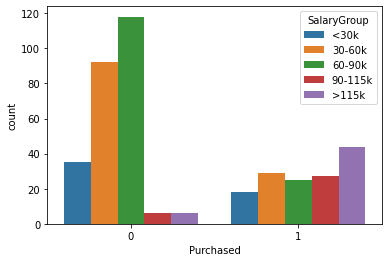

In [15]:
sns.countplot(x='Purchased', data=suv_data, hue='SalaryGroup',
              hue_order=['<30k', '30-60k', '60-90k', '90-115k', '>115k'])
plt.show()

#### 7. Build the independent and dependent variable arrays

Remember the structure of the DataFrame:

In [16]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeGroup,SalaryGroup
0,15624510,Male,19,19000,0,18-30,<30k
1,15810944,Male,35,20000,0,31-40,<30k
2,15668575,Female,26,43000,0,18-30,30-60k
3,15603246,Female,27,57000,0,18-30,30-60k
4,15804002,Male,19,76000,0,18-30,60-90k


I will not need the group columns I have created, neither the User ID column:

In [17]:
clean_data = suv_data.drop(['AgeGroup', 'SalaryGroup', 'User ID'], axis=1)
clean_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Now I need to make 'Gender' column a numerical column (1 for Female, 0 for Male):

In [18]:
clean_data['Gender'] = clean_data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
# clean_data.drop(['Gender'], axis=1, inplace=True) # Uncomment to try model without Gender, but better results are achieved with Gender
clean_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


Ensure that there are no null values in this cleaned DataFrame:

In [19]:
print(clean_data.isnull().sum().sum())

0


Extract X (dependent variables) and y (independent variable) from the cleaned DataFrame:

In [20]:
X = clean_data.drop(['Purchased'], axis=1)
y = clean_data['Purchased'].values
print(X.head(), '\n')
print(y[0:10])

   Gender  Age  EstimatedSalary
0       0   19            19000
1       0   35            20000
2       1   26            43000
3       1   27            57000
4       0   19            76000 

[0 0 0 0 0 0 0 1 0 0]


#### 8. Scale the independent variables

Import StandardScaler class and initialise object:

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Scale the independent variables to same distribution (mean = 0, variance = 1):

In [22]:
norm_X = sc.fit_transform(X)
norm_X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

#### 9. Split into train and test data

Given a test size (in this case, 25% of the whole sample), randomly divide the entries between train data, which will be used to train the model; and test data, which will be used to test the model's predictions.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
len(X_train), len(X_test)

(300, 100)

#### 10. Build and train logistic regression model

Import LogisticRegression class and initialise object:

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Fit the train data to the model:

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

#### 11. Apply trained model to the test data and check results

Use the model to make predictions (0/1 whether or not the client will buy an SUV) from the test entries' dependent variables:

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Import classification_report function and create report regarding how well the model has classified this train data (y_pred), compared to the actual true classification (y_test):

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



Import confusion_matrix function and create confusion matrix:

In [28]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
pd.DataFrame(cf_matrix, columns=['Predicted 0s','Predicted 1s'], index=['Actual 0s','Actual 1s'])

,Predicted 0s,Predicted 1s
Actual 0s,61,2
Actual 1s,10,27


#### 12. Predict probabilities instead of 0/1

In reality, a logistic regression actually generates values (probabilities) between 0 and 1. When the value is higher than 0.5 it is assigned to 1. On the other hand, when the value is lower than 0.5, it is assigned to 0.

Instead of directly obtaining the 0/1 classification, I want to reach the actual probabilities in each case.

In [29]:
y_test_probs = model.predict_proba(X_test)
y_test_probs[0:5]

array([[0.7439731 , 0.2560269 ],
       [0.02973754, 0.97026246],
       [0.97774951, 0.02225049],
       [0.16069512, 0.83930488],
       [0.98368824, 0.01631176]])

Now I search for the cases in which we are failing to predict well, and I check the probability values:

In [30]:
wrong_indices = []
for i in range(len(y_test)):
    real, pred = y_test[i], y_pred[i]
    if real != pred:
        print('{}, real: {}, predicted: {}, predicted probability: {}'
              .format(i, real, y_pred[i], y_test_probs[i][1]))
        wrong_indices.append(i)

17, real: 0, predicted: 1, predicted probability: 0.6406241038147275
22, real: 1, predicted: 0, predicted probability: 0.3375557452001464
26, real: 0, predicted: 1, predicted probability: 0.5451155889791178
30, real: 1, predicted: 0, predicted probability: 0.385625241342253
40, real: 1, predicted: 0, predicted probability: 0.45801389147395805
43, real: 1, predicted: 0, predicted probability: 0.31667429451067813
65, real: 1, predicted: 0, predicted probability: 0.26293053410222067
74, real: 1, predicted: 0, predicted probability: 0.4191489366633192
79, real: 1, predicted: 0, predicted probability: 0.2686614592041106
81, real: 1, predicted: 0, predicted probability: 0.3305695592629724
85, real: 1, predicted: 0, predicted probability: 0.38950423496340897
99, real: 1, predicted: 0, predicted probability: 0.4198652953617394


It seems like all probabilities of the entries we fail to classifiy correctly fall between 0.25 and 0.75, which make sense. These probabilities indicate that the model is not (so) that sure if assigning 0 or 1.

Let's check the probability distribution for all entries, not only the miss-classified:

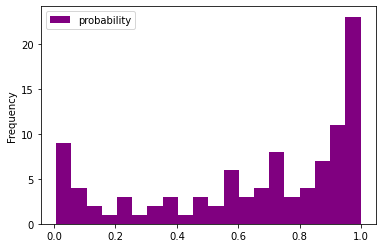

In [31]:
y_probabilities = []
for prob_0, prob_1 in y_test_probs:
    y_probabilities.append(prob_0)
y_probabilities = np.array(y_probabilities)

df = pd.DataFrame(data=y_probabilities, columns=['probability'])

df.plot.hist(bins=20, color='purple')
plt.show()

Lots of probability values are outside the 0.25-0.75 range. Let's check exactly how many:

In [32]:
def get_probability_group(prob):
    if prob < 0.25:
        return '<0.25'
    elif prob <= 0.75:
        return '0.25-0.75'
    else:
        return '>0.75'
    
df['probability_group'] = df['probability'].apply(get_probability_group)
df.head()

,probability,probability_group
0,0.743973,0.25-0.75
1,0.029738,<0.25
2,0.977750,>0.75
3,0.160695,<0.25
4,0.983688,>0.75


probability_group
0.25-0.75    33
<0.25        19
>0.75        48
dtype: int64


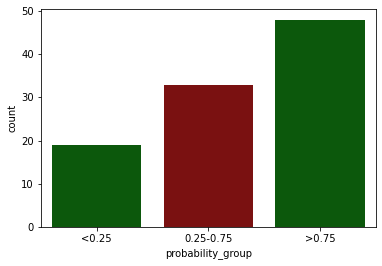

In [33]:
print(df.groupby('probability_group').size())
sns.countplot(x='probability_group', data=df, 
              palette=['darkgreen', 'darkred', 'darkgreen'], 
              order=['<0.25','0.25-0.75','>0.75'])
plt.show()

So 34% of the entries end up with a probability between 0.25 and 0.75. In this group, I really cannot be sure if the classification will work properly, since from 34 cases, 14 were missclassified (41%).

On the other hand, the remaining 66% of the entries (18% + 48%) have probabilities either higher than 0.75 or lower than 0.25. This means that the model is relatively sure of what class to assign (0/1). Within this group of entries, 100% have been correctly classified for the train test! 

#### 13. Linear regression coefficients

In [34]:
model.coef_

array([[-0.08564686,  1.98462669,  1.07716167]])

In [35]:
model.intercept_

array([-1.05450375])